### 1.4.3 学習用のソースコード

In [1]:
# 最適化アルゴリズム定義ファイルの読み込み
@show include("../common/optimizer.jl")
# スパイラル・データセット定義ファイルの読み込み
@show include("../dataset/spiral.jl")
# モデル定義ファイルの読み込み
@show include("./two_layer_net.jl")

include("../common/optimizer.jl") = Main.Optimizer
include("../dataset/spiral.jl") = Main.Spiral
include("./two_layer_net.jl") = backward!


backward! (generic function with 1 method)

In [2]:
# モジュールの読み込み
using .Optimizer
using .Spiral
using Random
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 10
hidden_size = 30
learning_rate = 1.0

1.0

In [4]:
seed = 2020
x, t = load_data(seed=seed)
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

seed = 2020


SGD(1.0)

In [5]:
# 学習で使用する変数
data_size = size(x ,1) # 300
max_iters = data_size ÷ batch_size # 整数除算「÷」は「\div」で入力 cf. https://docs.julialang.org/en/v1/manual/unicode-input/
loss_list = []

Any[]

In [6]:
function train!(model::TwoLayerNet, batch_x, batch_t)
    # 損失を計算
    loss = forward!(model, batch_x, batch_t) # model.forward()
    # 勾配を求める
    backward!(model) # model.backward()
    # パラメータを更新
    update!(optimizer, model.params, model.grads)
    
    push!(loss_list, loss)
    return loss
end

train! (generic function with 1 method)

In [7]:
function train!(model::TwoLayerNet, max_epoch, max_iters, train_x, train_t)
    total_loss = 0
    loss_count = 0
    
    for epoch = 1:max_epoch
        # ミニバッチの生成
        indices = rand(1:data_size, batch_size) # 1～data_sizeの範囲の一意な数値を要素に持つ要素数data_sizeのVectorを返す
        batch_x = train_x[indices, :]
        batch_t = train_t[indices, :]
        
        for iter = 1:max_iters
            loss = train!(model, batch_x, batch_t)
            total_loss += loss
            loss_count += 1
            # 定期的に学習経過を出力
            if iter % max_iters == 0
                avg_loss = total_loss / loss_count
                println("| epoch $(epoch) | iter $(iter) / $(max_iters) | loss $(round(avg_loss, digits=2))")
                push!(loss_list, avg_loss)
                total_loss, loss_count = 0, 0
            end
        end
    end
end

train! (generic function with 2 methods)

In [8]:
@time train!(model, max_epoch, max_iters, x, t)

| epoch 1 | iter 30 / 30 | loss 14.21
| epoch 2 | iter 30 / 30 | loss 12.22
| epoch 3 | iter 30 / 30 | loss 11.48
| epoch 4 | iter 30 / 30 | loss 10.33
| epoch 5 | iter 30 / 30 | loss 10.31
| epoch 6 | iter 30 / 30 | loss 9.59
| epoch 7 | iter 30 / 30 | loss 7.92
| epoch 8 | iter 30 / 30 | loss 7.45
| epoch 9 | iter 30 / 30 | loss 5.11
| epoch 10 | iter 30 / 30 | loss 9.29
| epoch 11 | iter 30 / 30 | loss 4.87
| epoch 12 | iter 30 / 30 | loss 3.1
| epoch 13 | iter 30 / 30 | loss 5.67
| epoch 14 | iter 30 / 30 | loss 6.59
| epoch 15 | iter 30 / 30 | loss 7.7
| epoch 16 | iter 30 / 30 | loss 2.52
| epoch 17 | iter 30 / 30 | loss 7.16
| epoch 18 | iter 30 / 30 | loss 3.05
| epoch 19 | iter 30 / 30 | loss 7.92
| epoch 20 | iter 30 / 30 | loss 2.26
| epoch 21 | iter 30 / 30 | loss 5.07
| epoch 22 | iter 30 / 30 | loss 4.61
| epoch 23 | iter 30 / 30 | loss 0.86
| epoch 24 | iter 30 / 30 | loss 6.09
| epoch 25 | iter 30 / 30 | loss 5.91
| epoch 26 | iter 30 / 30 | loss 4.77
| epoch 27 | iter 

| epoch 249 | iter 30 / 30 | loss 0.04
| epoch 250 | iter 30 / 30 | loss 0.2
| epoch 251 | iter 30 / 30 | loss 0.11
| epoch 252 | iter 30 / 30 | loss 0.19
| epoch 253 | iter 30 / 30 | loss 0.05
| epoch 254 | iter 30 / 30 | loss 0.59
| epoch 255 | iter 30 / 30 | loss 0.06
| epoch 256 | iter 30 / 30 | loss 0.06
| epoch 257 | iter 30 / 30 | loss 0.25
| epoch 258 | iter 30 / 30 | loss 0.08
| epoch 259 | iter 30 / 30 | loss 0.17
| epoch 260 | iter 30 / 30 | loss 0.05
| epoch 261 | iter 30 / 30 | loss 0.02
| epoch 262 | iter 30 / 30 | loss 0.38
| epoch 263 | iter 30 / 30 | loss 0.07
| epoch 264 | iter 30 / 30 | loss 0.62
| epoch 265 | iter 30 / 30 | loss 0.19
| epoch 266 | iter 30 / 30 | loss 0.11
| epoch 267 | iter 30 / 30 | loss 0.39
| epoch 268 | iter 30 / 30 | loss 0.25
| epoch 269 | iter 30 / 30 | loss 0.43
| epoch 270 | iter 30 / 30 | loss 0.1
| epoch 271 | iter 30 / 30 | loss 0.2
| epoch 272 | iter 30 / 30 | loss 0.09
| epoch 273 | iter 30 / 30 | loss 0.38
| epoch 274 | iter 30 / 30 |

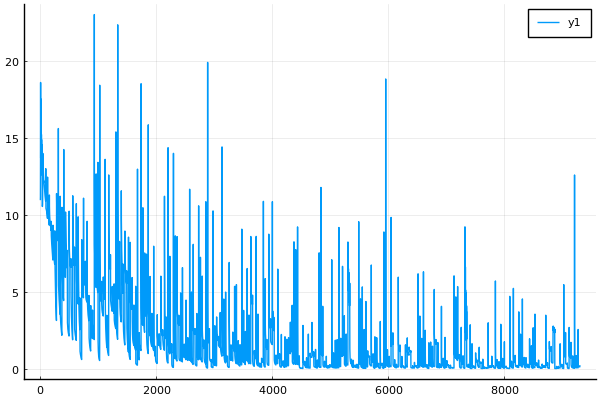

In [9]:
# 損失履歴を描画
plot(loss_list)

In [10]:
# 決定境界のプロットの準備
h = 0.001
x_min = minimum(x[:, 1]) .- .1
x_max = maximum(x[:, 1]) .+ .1
y_min = minimum(x[:, 2]) .- .1
y_max = maximum(x[:, 2]) .+ .1
_x = collect(x_min:h:x_max)
_y = collect(y_min:h:y_max)
xx = repeat(_x', outer=(length(_y),1)) # np.meshgrid()
yy = repeat(_y,  outer=(1,length(_x))) # np.meshgrid()
X = hcat(collect(Iterators.flatten(xx)), collect(Iterators.flatten(yy)))
score = predict!(model, X)
predict_cls = mapslices(argmax, score, dims=2)[:]
Z = reshape(predict_cls, size(xx)...)

2022×2051 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

seed = 2020


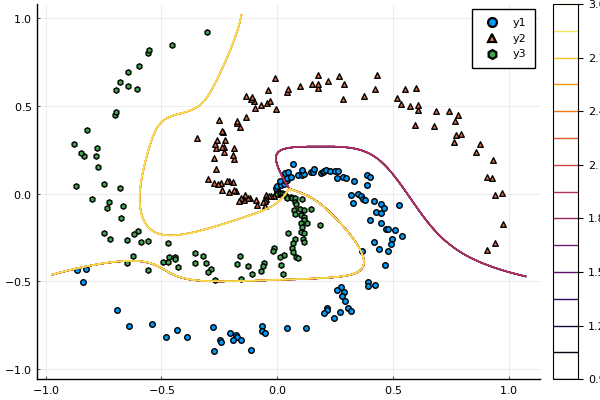

In [11]:
# データ点のプロット
x, t = load_data(seed=seed)
N = 100
CLS_NUM = 3
markers = [:circle, :utriangle, :hexagon]
for i in 0:CLS_NUM - 1
    # 1つ目のクラスを描画
    if i == 0
        plot(x[(i * N) + 1:(i + 1) * N, 1], x[(i * N) + 1:(i + 1) * N, 2], st=:scatter, marker = markers[i + 1])
    # 最後のクラスを描画する際に表示する
    elseif i == CLS_NUM - 1　
        plot!(x[(i * N) + 1:(i + 1) * N, 1], x[(i * N) + 1:(i + 1) * N, 2], st=:scatter, marker = markers[i + 1])
    # 表示はせず，上書きとして描画する
    else
        plot!(x[(i * N) + 1:(i + 1) * N, 1], x[(i * N) + 1:(i + 1) * N, 2], st=:scatter, marker = markers[i + 1])
    end
end
# 決定境界のプロット
plot!(xx, yy, Z, st=:contour)